# Make figure 2 - Historic behavior of Brunt Ice Shelf/Cyclic rifting and calving

### Load necessary libraries

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import rasterio
import shapefile
from rasterio.plot import show
from rasterio.merge import merge
from matplotlib.patches import Rectangle
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from rasterio.warp import calculate_default_transform, reproject, Resampling
from pyproj import Transformer
from pyproj import Geod
from matplotlib_scalebar.scalebar import ScaleBar

figure_folder = '/home/ram21/notebooks/brunt-is2-rifts/figures'


### Imagery - Load Landsat

Main imagery

In [2]:
# Landsat-8 2020-02-20 - Pre NR calving

landsat_out_B2 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/LC08_L1GT_184113_184114_20200220_B2_merge.tif'
landsat_out_B3 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/LC08_L1GT_184113_184114_20200220_B3_merge.tif'
landsat_out_B4 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/landsat/LC08_L1GT_184113_184114_20200220_B4_merge.tif'

img1_2 = rasterio.open(landsat_out_B2)
img1_3 = rasterio.open(landsat_out_B3)
img1_4 = rasterio.open(landsat_out_B4)

# crop to 99th percentile (stops dull images)
image1_2 = img1_2.read(1)
image1_2[image1_2 > np.percentile(image1_2,99)] = np.percentile(image1_2,99)
image1_3 = img1_3.read(1)
image1_3[image1_3 > np.percentile(image1_3,99)] = np.percentile(image1_3,99)
image1_4 = img1_4.read(1)
image1_4[image1_4 > np.percentile(image1_4,99)] = np.percentile(image1_4,99)

image1 = np.array([image1_4, image1_3, image1_2]).transpose(1,2,0)
norm1 = (image1 * (255 / np.max(image1))).astype(np.uint8)

In [3]:
# Sentinel-2 2021-03-14 - Post NR calving / Pre Chasm 1 calving

sentinel_out_B2_ps = '/home/ram21/notebooks/brunt-is2-rifts/halloween/sentinel2/20210314T100059_B2_ps_merge.tif'
sentinel_out_B3_ps = '/home/ram21/notebooks/brunt-is2-rifts/halloween/sentinel2/20210314T100059_B3_ps_merge.tif'
sentinel_out_B4_ps = '/home/ram21/notebooks/brunt-is2-rifts/halloween/sentinel2/20210314T100059_B4_ps_merge.tif'

simg1_2 = rasterio.open(sentinel_out_B2_ps)
simg1_3 = rasterio.open(sentinel_out_B3_ps)
simg1_4 = rasterio.open(sentinel_out_B4_ps)

simage1_2 = simg1_2.read(1)
simage1_2[simage1_2 > np.percentile(simage1_2,99)] = np.percentile(simage1_2,99)
simage1_3 = simg1_3.read(1)
simage1_3[simage1_3 > np.percentile(simage1_3,99)] = np.percentile(simage1_3,99)
simage1_4 = simg1_4.read(1)
simage1_4[simage1_4 > np.percentile(simage1_4,99)] = np.percentile(simage1_4,99)

simage1 = np.array([simage1_4, simage1_3, simage1_2]).transpose(1,2,0)
snorm1 = (simage1 * (255 / np.max(simage1))).astype(np.uint8)

In [4]:
# Sentinel-2 2023-01-24 - Post Chasm 1 calving

sentinel_out_B2_ps = '/home/ram21/notebooks/brunt-is2-rifts/halloween/sentinel2/20230124T093009_B2_ps_merge.tif'
sentinel_out_B3_ps = '/home/ram21/notebooks/brunt-is2-rifts/halloween/sentinel2/20230124T093009_B3_ps_merge.tif'
sentinel_out_B4_ps = '/home/ram21/notebooks/brunt-is2-rifts/halloween/sentinel2/20230124T093009_B4_ps_merge.tif'

simg1_2_c1 = rasterio.open(sentinel_out_B2_ps)
simg1_3_c1 = rasterio.open(sentinel_out_B3_ps)
simg1_4_c1 = rasterio.open(sentinel_out_B4_ps)

simage1_2_c1 = simg1_2_c1.read(1)
simage1_2_c1[simage1_2_c1 > np.percentile(simage1_2_c1,99)] = np.percentile(simage1_2_c1,99)
simage1_3_c1 = simg1_3_c1.read(1)
simage1_3_c1[simage1_3_c1 > np.percentile(simage1_3_c1,99)] = np.percentile(simage1_3_c1,99)
simage1_4_c1 = simg1_4_c1.read(1)
simage1_4_c1[simage1_4_c1 > np.percentile(simage1_4_c1,99)] = np.percentile(simage1_4_c1,99)

simage1_c1 = np.array([simage1_4_c1, simage1_3_c1, simage1_2_c1]).transpose(1,2,0)
snorm1_c1 = (simage1_c1 * (255 / np.max(simage1_c1))).astype(np.uint8)

McDonald Ice Rumples small images

In [5]:
# Landsat-1 1973

landsat1_1973 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LM01_L1GS_195114_19730127_20200909_02_T2/LM01_L1GS_195114_19730127_20200909_02_T2_B4_georeferenced.png'

L1_1973 = rasterio.open(landsat1_1973)
L1_1973_img = L1_1973.read(1)

L1_1973_img[L1_1973_img > np.percentile(L1_1973_img,99)] = np.percentile(L1_1973_img,99)

In [6]:
# Landsat-5 1986

landsat5_1986 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LT05_L1GS_183114_19860130_20200918_02_T2/LT05_L1GS_183114_19860130_20200918_02_T2_B3.TIF'

L5_1986 = rasterio.open(landsat5_1986)
L5_1986_img = L5_1986.read(1)

L5_1986_img[L5_1986_img > np.percentile(L5_1986_img,99)] = np.percentile(L5_1986_img,99)

In [7]:
# Landsat-5 1997

landsat5_1997 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LT05_L1GS_183114_19970301_20200910_02_T2/LT05_L1GS_183114_19970301_20200910_02_T2_B3.TIF'

L5_1997 = rasterio.open(landsat5_1997)
L5_1997_img = L5_1997.read(1)

L5_1997_img[L5_1997_img > np.percentile(L5_1997_img,99)] = np.percentile(L5_1997_img,99)

In [8]:
# Landsat-7 2002

landsat7_2002 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LE07_L1GT_183114_20021220_20200916_02_T2/LE07_L1GT_183114_20021220_20200916_02_T2_B8.TIF'

L7_2002 = rasterio.open(landsat7_2002)
L7_2002_img = L7_2002.read(1)

L7_2002_img[L7_2002_img > np.percentile(L7_2002_img,99)] = np.percentile(L7_2002_img,99)

In [9]:
# Landsat-7 2008

landsat7_2008 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LE07_L1GT_184114_20080227_20200913_02_T2/LE07_L1GT_184114_20080227_20200913_02_T2_B3.TIF'

L7_2008 = rasterio.open(landsat7_2008)
L7_2008_img = L7_2008.read(1)

L7_2008_img[L7_2008_img > np.percentile(L7_2008_img,99)] = np.percentile(L7_2008_img,99)

In [10]:
# Landsat-8 2021/03

landsat8_03_B2 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LC08_L1GT_185113_20210301_20210311_02_T2/LC08_L1GT_185113_20210301_20210311_02_T2_B2.TIF'
landsat8_03_B3 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LC08_L1GT_185113_20210301_20210311_02_T2/LC08_L1GT_185113_20210301_20210311_02_T2_B3.TIF'
landsat8_03_B4 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LC08_L1GT_185113_20210301_20210311_02_T2/LC08_L1GT_185113_20210301_20210311_02_T2_B4.TIF'

L8_03_B2 = rasterio.open(landsat8_03_B2)
L8_03_B3 = rasterio.open(landsat8_03_B3)
L8_03_B4 = rasterio.open(landsat8_03_B4)

L8_03_B2_img = L8_03_B2.read(1)
L8_03_B2_img[L8_03_B2_img > np.percentile(L8_03_B2_img,99)] = np.percentile(L8_03_B2_img,99)
L8_03_B3_img = L8_03_B3.read(1)
L8_03_B3_img[L8_03_B3_img > np.percentile(L8_03_B3_img,99)] = np.percentile(L8_03_B3_img,99)
L8_03_B4_img = L8_03_B4.read(1)
L8_03_B4_img[L8_03_B4_img > np.percentile(L8_03_B4_img,99)] = np.percentile(L8_03_B4_img,99)

L8_03_image1 = np.array([L8_03_B4_img, L8_03_B3_img, L8_03_B2_img]).transpose(1,2,0)
L8_03_norm1 = (L8_03_image1 * (255 / np.max(L8_03_image1))).astype(np.uint8)


Chasm 1 / HC upstream small images

In [11]:
# Landsat-8 2021/02/06

landsat8_D1_B2 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LC08_L1GT_184114_20210206_20210302_02_T2/LC08_L1GT_184114_20210206_20210302_02_T2_B2.TIF'
landsat8_D1_B3 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LC08_L1GT_184114_20210206_20210302_02_T2/LC08_L1GT_184114_20210206_20210302_02_T2_B3.TIF'
landsat8_D1_B4 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LC08_L1GT_184114_20210206_20210302_02_T2/LC08_L1GT_184114_20210206_20210302_02_T2_B4.TIF'

L8_D1_B2 = rasterio.open(landsat8_D1_B2)
L8_D1_B3 = rasterio.open(landsat8_D1_B3)
L8_D1_B4 = rasterio.open(landsat8_D1_B4)

L8_D1_B2_img = L8_D1_B2.read(1)
L8_D1_B2_img[L8_D1_B2_img > np.percentile(L8_D1_B2_img,99)] = np.percentile(L8_D1_B2_img,99)
L8_D1_B3_img = L8_D1_B3.read(1)
L8_D1_B3_img[L8_D1_B3_img > np.percentile(L8_D1_B3_img,99)] = np.percentile(L8_D1_B3_img,99)
L8_D1_B4_img = L8_D1_B4.read(1)
L8_D1_B4_img[L8_D1_B4_img > np.percentile(L8_D1_B4_img,99)] = np.percentile(L8_D1_B4_img,99)

L8_D1_image1 = np.array([L8_D1_B4_img, L8_D1_B3_img, L8_D1_B2_img]).transpose(1,2,0)
L8_D1_norm1 = (L8_D1_image1 * (255 / np.max(L8_D1_image1))).astype(np.uint8)


In [12]:
# Landsat-9 2022/02/17

landsat9_D2_B2 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LC09_L1GT_184114_20220217_20220217_02_T2/LC09_L1GT_184114_20220217_20220217_02_T2_B2.TIF'
landsat9_D2_B3 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LC09_L1GT_184114_20220217_20220217_02_T2/LC09_L1GT_184114_20220217_20220217_02_T2_B3.TIF'
landsat9_D2_B4 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LC09_L1GT_184114_20220217_20220217_02_T2/LC09_L1GT_184114_20220217_20220217_02_T2_B4.TIF'

L9_D2_B2 = rasterio.open(landsat9_D2_B2)
L9_D2_B3 = rasterio.open(landsat9_D2_B3)
L9_D2_B4 = rasterio.open(landsat9_D2_B4)

L9_D2_B2_img = L9_D2_B2.read(1)
L9_D2_B2_img[L9_D2_B2_img > np.percentile(L9_D2_B2_img,99)] = np.percentile(L9_D2_B2_img,99)
L9_D2_B3_img = L9_D2_B3.read(1)
L9_D2_B3_img[L9_D2_B3_img > np.percentile(L9_D2_B3_img,99)] = np.percentile(L9_D2_B3_img,99)
L9_D2_B4_img = L9_D2_B4.read(1)
L9_D2_B4_img[L9_D2_B4_img > np.percentile(L9_D2_B4_img,99)] = np.percentile(L9_D2_B4_img,99)

L9_D2_image1 = np.array([L9_D2_B4_img, L9_D2_B3_img, L9_D2_B2_img]).transpose(1,2,0)
L9_D2_norm1 = (L9_D2_image1 * (255 / np.max(L9_D2_image1))).astype(np.uint8)


In [13]:
# Landsat-8 2022/12/28

landsat8_D3_B2 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LC08_L1GT_182114_20221228_20221228_02_RT/LC08_L1GT_182114_20221228_20221228_02_RT_B2.TIF'
landsat8_D3_B3 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LC08_L1GT_182114_20221228_20221228_02_RT/LC08_L1GT_182114_20221228_20221228_02_RT_B3.TIF'
landsat8_D3_B4 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/LC08_L1GT_182114_20221228_20221228_02_RT/LC08_L1GT_182114_20221228_20221228_02_RT_B4.TIF'

L8_D3_B2 = rasterio.open(landsat8_D3_B2)
L8_D3_B3 = rasterio.open(landsat8_D3_B3)
L8_D3_B4 = rasterio.open(landsat8_D3_B4)

L8_D3_B2_img = L8_D3_B2.read(1)
L8_D3_B2_img[L8_D3_B2_img > np.percentile(L8_D3_B2_img,99)] = np.percentile(L8_D3_B2_img,99)
L8_D3_B3_img = L8_D3_B3.read(1)
L8_D3_B3_img[L8_D3_B3_img > np.percentile(L8_D3_B3_img,99)] = np.percentile(L8_D3_B3_img,99)
L8_D3_B4_img = L8_D3_B4.read(1)
L8_D3_B4_img[L8_D3_B4_img > np.percentile(L8_D3_B4_img,99)] = np.percentile(L8_D3_B4_img,99)

L8_D3_image1 = np.array([L8_D3_B4_img, L8_D3_B3_img, L8_D3_B2_img]).transpose(1,2,0)
L8_D3_norm1 = (L8_D3_image1 * (255 / np.max(L8_D3_image1))).astype(np.uint8)


In [14]:
# Aerial 1969-02-07

aerial_1969 = '/home/ram21/notebooks/brunt-is2-rifts/halloween/Landsat_history/aerial/CA218133R0300.tif'

ap_1969 = rasterio.open(aerial_1969)
ap_1969_img = ap_1969.read(1)

ap_1969_img[ap_1969_img > np.percentile(ap_1969_img,99)] = np.percentile(ap_1969_img,99)


/home/ram21/.local/lib/python3.9/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


### Shapefiles
load grounded ice, floating ice, grounding line, fronts and rifts shapefiles

In [15]:
# Grounded ice and floating ice shapefiles
shpfileADD = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_for_plotting/ADD_DerivedLowresBasemap.shp"
shapefileADD = gpd.read_file(shpfileADD)

shapefileADD_Land = shapefileADD[shapefileADD.Category=="Land"]
shapefileADD_shelf = shapefileADD[shapefileADD.Category=="Ice shelf"]

# Grounding line
shpfileASAIDGL = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_for_plotting/ASAID_GroundingLine_Continent.shp"
shapefileASAIDGL = gpd.read_file(shpfileASAIDGL)

# 1914/15
shpfilef15 = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_history/Brunt_front_1915_Thomas73fig7.shp"
shapefilef15 = gpd.read_file(shpfilef15)

# 1955
shpfilef55 = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_history/Brunt_front_1955_Thomas73fig7.shp"
shapefilef55 = gpd.read_file(shpfilef55)

# 1960s
shpfilef60 = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_history/Brunt_front_1960s_Thomas73fig2.shp"
shapefilef60 = gpd.read_file(shpfilef60)

# calved
shpfilec60 = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_history/Brunt_calved_1960s_Thomas73fig2.shp"
shapefilec60 = gpd.read_file(shpfilec60)

# rift
shpfiler68 = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_history/Brunt_rift_1968_Thomas73fig8.shp"
shapefiler68 = gpd.read_file(shpfiler68)

# water
shpfilew60 = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_history/Brunt_water_1960s_Thomas73fig2.shp"
shapefilew60 = gpd.read_file(shpfilew60)

# 2020
shpfilef20 = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_history/Brunt_front_2020.shp"
shapefilef20 = gpd.read_file(shpfilef20)

# 2021
shpfilef21 = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_history/Brunt_front_2021.shp"
shapefilef21 = gpd.read_file(shpfilef21)

# 2022
shpfiletips2 = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_history/20221031_chasm1.shp"
shapefiletips2 = gpd.read_file(shpfiletips2)
shpfiletips3 = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_history/20221031_frontal_rift.shp"
shapefiletips3 = gpd.read_file(shpfiletips3)

# 2023
shpfilef23 = "/home/ram21/notebooks/brunt-is2-rifts/halloween/shapefiles_history/Brunt_front_2023.shp"
shapefilef23 = gpd.read_file(shpfilef23)


### HC tip

In [16]:
HC_tip = {
    "year": [2020,2021,2022,2023],
    "month": [2,2,2,1],
    "day": [20,6,17,24],
    "decdate":[0.0,0.0,0.0,0.0],
    "east": [-701533,-702095,-702425,-702719],
    "north": [1424819,1424318,1423982,1423646]
}


HC_tip = pd.DataFrame(HC_tip)

for i in range(0,np.shape(HC_tip)[0]):
    HC_tip["decdate"][i] = HC_tip["year"][i] + ((HC_tip["month"][i]-1) / 12) + ((HC_tip["day"][i]-1) / 365)
    
    
    

/tmp/ipykernel_22601/2439554365.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HC_tip["decdate"][i] = HC_tip["year"][i] + ((HC_tip["month"][i]-1) / 12) + ((HC_tip["day"][i]-1) / 365)


In [17]:
display(HC_tip)

,year,month,day,decdate,east,north
0,2020,2,20,2020.135388,-701533,1424819
1,2021,2,6,2021.097032,-702095,1424318
2,2022,2,17,2022.127169,-702425,1423982
3,2023,1,24,2023.063014,-702719,1423646


### North Arrow

In [18]:
# work out a north arrow

transformer = Transformer.from_crs("EPSG:4326","EPSG:3031")
[e1,n1] = transformer.transform(-75.5,-29.5)
[e2,n2] = transformer.transform(-75.6,-29.5)

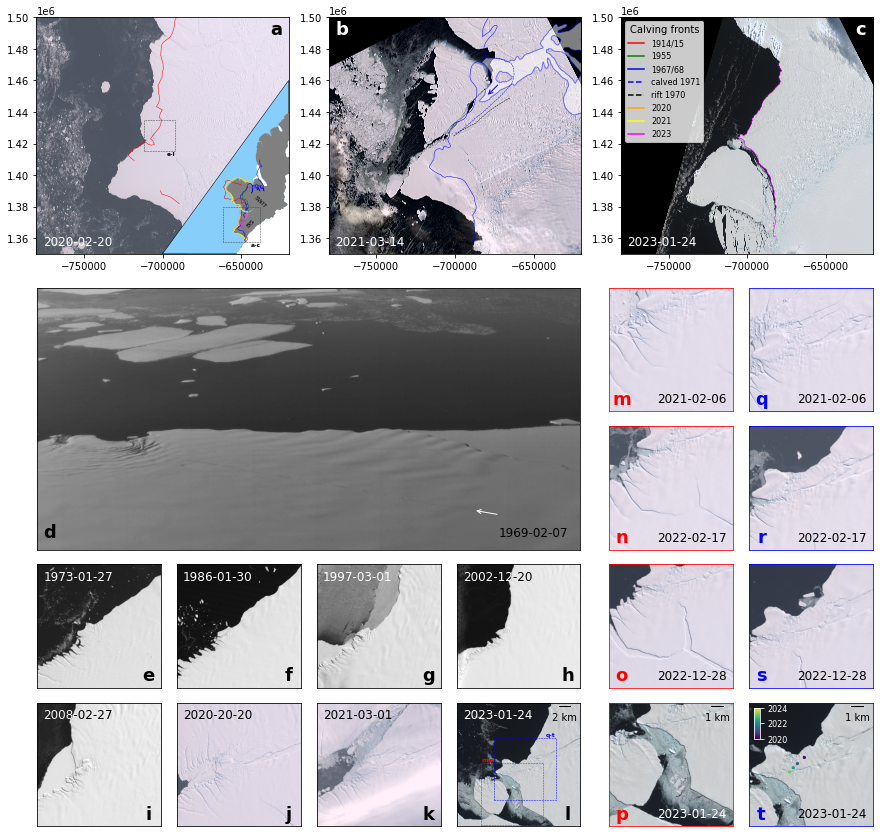

In [19]:
gr = 0.25

xmin = -780000
xmax = -620000
ymin = 1350000 
ymax = 1500000

xmin_mir = -712000
xmax_mir = -692000
ymin_mir = 1415000 
ymax_mir = 1435000

xmin_c1 = -708000
xmax_c1 = -698000
ymin_c1 = 1415250
ymax_c1 = 1425250

xmin_d = -706000
xmax_d = -696000
ymin_d = 1419250
ymax_d = 1429250

fig = plt.figure(figsize=(15, 15))

gs = gridspec.GridSpec(65, 66)

#----------------------------------------------------------------------
# TOP LEFT
ax11 = plt.subplot(gs[0:20,0:20])

show(norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax11)

# 1914/15 front (red)
shapefilef15[0:2].plot(color='r',linewidth=0.5,ax=ax11)

ax11.plot([xmin_mir,xmin_mir,xmax_mir,xmax_mir,xmin_mir],\
           [ymin_mir,ymax_mir,ymax_mir,ymin_mir,ymin_mir],\
           '--',color=(gr,gr,gr),linewidth=0.5)
ax11.fill([-700000,xmax,xmax,-700000],\
           [ymin,1460000,ymin,ymin],'lightskyblue')
ax11.plot([-700000,xmax,xmax,-700000],\
           [ymin,1460000,ymin,ymin],\
           '-',color='k',linewidth=0.5)

# plot inset wider area map
axins11=ax11.inset_axes([0.71, 0.0, 0.3, 1.0])
shapefileADD_Land.plot(color="white",ax=axins11)
shapefileADD_shelf.plot(color="gray",ax=axins11)
# 1914/15 front (red)
shapefilef15.plot(color='r',linewidth=0.5,ax=axins11)
# 1955 front (green)
shapefilef55.plot(color='g',linewidth=0.5,ax=axins11)
# 1960s front (blue)
shapefilef60.plot(color='b',linewidth=0.5,ax=axins11)
# 2020 front (orange)
shapefilef20.plot(color='orange',linewidth=0.5,ax=axins11)
# 2021 front (yellow)
shapefilef21.plot(color='yellow',linewidth=0.5,ax=axins11)
# 2023 front (magenta)
shapefilef23.plot(color='magenta',linewidth=0.5,ax=axins11)

axins11.set_xlim(-800000,-500000)
axins11.set_ylim(1300000,2300000)
axins11.axis('off')

axins11.plot([xmin,xmin,xmax,xmax,xmin],\
           [ymin,ymax,ymax,ymin,ymin],\
           '--',color=(gr,gr,gr),linewidth=0.5)

#----------------------------------------------------------------------
# TOP CENTER
ax12 = plt.subplot(gs[0:20,23:43])

show(snorm1.transpose(2,0,1), transform=simg1_2.transform, ax=ax12)

# 1960s front, calved area and water/melange
shapefilef60.plot(color='b',linewidth=0.5,ax=ax12)
shapefilec60.plot(color='b',linewidth=0.5,linestyle='--',ax=ax12)
shapefilew60.plot(edgecolor='b',color='w',alpha=0.5,ax=ax12)
# 1968 rift (dashed black)
shapefiler68.plot(color='k',linewidth=0.5,linestyle='--',ax=ax12)

ax12.annotate('', xy=(-680000,1450000), xytext=(-672000,1458000), arrowprops=dict(arrowstyle='->',linewidth=1,color='b'))

#----------------------------------------------------------------------
# TOP RIGHT
ax13 = plt.subplot(gs[0:20,46:66])

show(snorm1_c1.transpose(2,0,1), transform=simg1_2_c1.transform, ax=ax13)
# 2023 front
shapefilef23.plot(color='magenta',linewidth=0.5,ax=ax13)

# hidden for legend
pl15,=ax13.plot([-700000,-710000],[1510000,1510000],'r')
pl55,=ax13.plot([-700000,-710000],[1520000,1520000],'g')
pl60,=ax13.plot([-700000,-710000],[1530000,1530000],'b')
cl71,=ax13.plot([-700000,-710000],[1540000,1540000],'b',linestyle='--')
rt68,=ax13.plot([-700000,-710000],[1550000,1550000],'k',linestyle='--')
pl20,=ax13.plot([-700000,-710000],[1560000,1560000],'orange')
pl21,=ax13.plot([-700000,-710000],[1570000,1570000],'yellow')
pl23,=ax13.plot([-700000,-710000],[1570000,1580000],'magenta')

ax13.legend([pl15, pl55, pl60, cl71, rt68, pl20, pl21, pl23], ['1914/15', '1955', '1967/68', 'calved 1971', 'rift 1970', '2020', '2021', '2023'], title='Calving fronts', loc='upper left', fontsize=8)

#----------------------------------------------------------------------
# AERIAL 1969
ax21 = plt.subplot(gs[22:43,0:43])
ax21.imshow(ap_1969_img, cmap='gray')
ax21.annotate('', xy=(6000,4285), xytext=(6200,4320), arrowprops=dict(arrowstyle='->',linewidth=1,color='w'))

#----------------------------------------------------------------------
# MIR HISTORY
# Landsat-1 1973
ax31 = plt.subplot(gs[44:54,0:10])
show(L1_1973_img, transform=L1_1973.transform,cmap='gray',ax=ax31)

# Landsat-5 1986
ax32 = plt.subplot(gs[44:54,11:21])
show(L5_1986_img, transform=L5_1986.transform,cmap='gray',ax=ax32)

# Landsat-5 1997
ax33 = plt.subplot(gs[44:54,22:32])
show(L5_1997_img, transform=L5_1997.transform,cmap='gray',ax=ax33)

# Landsat-7 2002
ax34 = plt.subplot(gs[44:54,33:43])
show(L7_2002_img, transform=L7_2002.transform, cmap='gray',ax=ax34)

# Landsat-7 2008
ax35 = plt.subplot(gs[55:65,0:10])
show(L7_2008_img, transform=L7_2008.transform, cmap='gray',ax=ax35)

# Landsat-8 2020
ax36 = plt.subplot(gs[55:65,11:21])
show(norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax36)

# Landsat-8 2021/02
ax37 = plt.subplot(gs[55:65,22:32])
show(L8_03_norm1.transpose(2,0,1), transform=L8_03_B2.transform,ax=ax37)

# Landsat-8 2021/10
ax38 = plt.subplot(gs[55:65,33:43])
show(snorm1_c1.transpose(2,0,1), transform=simg1_2_c1.transform, ax=ax38)

scale38 = ScaleBar(dx=1, box_color='none')
ax38.add_artist(scale38)

ax38.plot([xmin_c1,xmin_c1,xmax_c1,xmax_c1,xmin_c1],\
           [ymin_c1,ymax_c1,ymax_c1,ymin_c1,ymin_c1],\
           '--',color='r',linewidth=0.5)

ax38.plot([xmin_d,xmin_d,xmax_d,xmax_d,xmin_d],\
           [ymin_d,ymax_d,ymax_d,ymin_d,ymin_d],\
           '--',color='b',linewidth=0.5)

#----------------------------------------------------------------------
# DAMAGE
# Chasm 1
ax41 = plt.subplot(gs[22:32,45:55])
show(L8_D1_norm1.transpose(2,0,1), transform=L8_D1_B2.transform, ax=ax41)

ax42 = plt.subplot(gs[33:43,45:55])
show(L9_D2_norm1.transpose(2,0,1), transform=L9_D2_B2.transform, ax=ax42)

ax43 = plt.subplot(gs[44:54,45:55])
show(L8_D3_norm1.transpose(2,0,1), transform=L8_D3_B2.transform, ax=ax43)

ax44 = plt.subplot(gs[55:65,45:55])
show(snorm1_c1.transpose(2,0,1), transform=simg1_2_c1.transform, ax=ax44)
scale44 = ScaleBar(dx=1, box_color='none')
ax44.add_artist(scale44)

# upstream of MIR
ax45 = plt.subplot(gs[22:32,56:66])
show(L8_D1_norm1.transpose(2,0,1), transform=L8_D1_B2.transform, ax=ax45)

ax46 = plt.subplot(gs[33:43,56:66])
show(L9_D2_norm1.transpose(2,0,1), transform=L9_D2_B2.transform, ax=ax46)

ax47 = plt.subplot(gs[44:54,56:66])
show(L8_D3_norm1.transpose(2,0,1), transform=L8_D3_B2.transform, ax=ax47)

ax48 = plt.subplot(gs[55:65,56:66])
show(snorm1_c1.transpose(2,0,1), transform=simg1_2_c1.transform, ax=ax48)
scale48 = ScaleBar(dx=1, box_color='none')
ax48.add_artist(scale48)

HC_tip_east = np.array(HC_tip["east"])
HC_tip_north = np.array(HC_tip["north"])
HC_tip_decdate = np.array(HC_tip["decdate"])

pl_hc_tip = ax48.scatter(HC_tip_east,HC_tip_north,s=5,c=HC_tip_decdate,vmin=2020,vmax=2024)

cbaxes48 = inset_axes(ax48, width="5%", height="25%",loc='upper left',borderpad=0.5)
cbar48 = plt.colorbar(pl_hc_tip,ticks=[2020,2022,2024],cax=cbaxes48)

cbar48.ax.yaxis.set_tick_params(color='w')
cbar48.outline.set_edgecolor('w')
cbar48.ax.tick_params(labelsize=8)
plt.setp(plt.getp(cbar48.ax.axes, 'yticklabels'), color='w')

#----------------------------------------------------------------------
# PARAMETERS
# locator_params
ax11.locator_params(axis='x', nbins=5)
ax12.locator_params(axis='x', nbins=5)
ax13.locator_params(axis='x', nbins=5)

# ticks/ticklabels
ax21.xaxis.set_ticks([])
ax21.yaxis.set_ticks([])
ax21.xaxis.set_ticklabels([])
ax21.yaxis.set_ticklabels([])
ax31.xaxis.set_ticks([])
ax31.yaxis.set_ticks([])
ax31.xaxis.set_ticklabels([])
ax31.yaxis.set_ticklabels([])
ax32.xaxis.set_ticks([])
ax32.yaxis.set_ticks([])
ax32.xaxis.set_ticklabels([])
ax32.yaxis.set_ticklabels([])
ax33.xaxis.set_ticks([])
ax33.yaxis.set_ticks([])
ax33.xaxis.set_ticklabels([])
ax33.yaxis.set_ticklabels([])
ax34.xaxis.set_ticks([])
ax34.yaxis.set_ticks([])
ax34.xaxis.set_ticklabels([])
ax34.yaxis.set_ticklabels([])
ax35.xaxis.set_ticks([])
ax35.yaxis.set_ticks([])
ax35.xaxis.set_ticklabels([])
ax35.yaxis.set_ticklabels([])
ax36.xaxis.set_ticks([])
ax36.yaxis.set_ticks([])
ax36.xaxis.set_ticklabels([])
ax36.yaxis.set_ticklabels([])
ax37.xaxis.set_ticks([])
ax37.yaxis.set_ticks([])
ax37.xaxis.set_ticklabels([])
ax37.yaxis.set_ticklabels([])
ax38.xaxis.set_ticks([])
ax38.yaxis.set_ticks([])
ax38.xaxis.set_ticklabels([])
ax38.yaxis.set_ticklabels([])
ax41.xaxis.set_ticks([])
ax41.yaxis.set_ticks([])
ax41.xaxis.set_ticklabels([])
ax41.yaxis.set_ticklabels([])
ax42.xaxis.set_ticks([])
ax42.yaxis.set_ticks([])
ax42.xaxis.set_ticklabels([])
ax42.yaxis.set_ticklabels([])
ax43.xaxis.set_ticks([])
ax43.yaxis.set_ticks([])
ax43.xaxis.set_ticklabels([])
ax43.yaxis.set_ticklabels([])
ax44.xaxis.set_ticks([])
ax44.yaxis.set_ticks([])
ax44.xaxis.set_ticklabels([])
ax44.yaxis.set_ticklabels([])
ax45.xaxis.set_ticks([])
ax45.yaxis.set_ticks([])
ax45.xaxis.set_ticklabels([])
ax45.yaxis.set_ticklabels([])
ax46.xaxis.set_ticks([])
ax46.yaxis.set_ticks([])
ax46.xaxis.set_ticklabels([])
ax46.yaxis.set_ticklabels([])
ax47.xaxis.set_ticks([])
ax47.yaxis.set_ticks([])
ax47.xaxis.set_ticklabels([])
ax47.yaxis.set_ticklabels([])
ax48.xaxis.set_ticks([])
ax48.yaxis.set_ticks([])
ax48.xaxis.set_ticklabels([])
ax48.yaxis.set_ticklabels([])

#axis color
ax41.spines['bottom'].set_color('r')
ax41.spines['top'].set_color('r') 
ax41.spines['right'].set_color('r')
ax41.spines['left'].set_color('r')
ax42.spines['bottom'].set_color('r')
ax42.spines['top'].set_color('r') 
ax42.spines['right'].set_color('r')
ax42.spines['left'].set_color('r')
ax43.spines['bottom'].set_color('r')
ax43.spines['top'].set_color('r') 
ax43.spines['right'].set_color('r')
ax43.spines['left'].set_color('r')
ax44.spines['bottom'].set_color('r')
ax44.spines['top'].set_color('r') 
ax44.spines['right'].set_color('r')
ax44.spines['left'].set_color('r')
ax45.spines['bottom'].set_color('b')
ax45.spines['top'].set_color('b') 
ax45.spines['right'].set_color('b')
ax45.spines['left'].set_color('b')
ax46.spines['bottom'].set_color('b')
ax46.spines['top'].set_color('b') 
ax46.spines['right'].set_color('b')
ax46.spines['left'].set_color('b')
ax47.spines['bottom'].set_color('b')
ax47.spines['top'].set_color('b') 
ax47.spines['right'].set_color('b')
ax47.spines['left'].set_color('b')
ax48.spines['bottom'].set_color('b')
ax48.spines['top'].set_color('b') 
ax48.spines['right'].set_color('b')
ax48.spines['left'].set_color('b')

# min,max
ax11.set_xlim(xmin,xmax)
ax11.set_ylim(ymin,ymax)
ax12.set_xlim(xmin,xmax)
ax12.set_ylim(ymin,ymax)
ax13.set_xlim(xmin,xmax)
ax13.set_ylim(ymin,ymax)
ax21.set_xlim(2500,6850)
ax21.set_ylim(4600,2500)
ax31.set_xlim(xmin_mir,xmax_mir)
ax31.set_ylim(ymin_mir,ymax_mir)
ax32.set_xlim(xmin_mir,xmax_mir)
ax32.set_ylim(ymin_mir,ymax_mir)
ax33.set_xlim(xmin_mir,xmax_mir)
ax33.set_ylim(ymin_mir,ymax_mir)
ax34.set_xlim(xmin_mir,xmax_mir)
ax34.set_ylim(ymin_mir,ymax_mir)
ax35.set_xlim(xmin_mir,xmax_mir)
ax35.set_ylim(ymin_mir,ymax_mir)
ax36.set_xlim(xmin_mir,xmax_mir)
ax36.set_ylim(ymin_mir,ymax_mir)
ax37.set_xlim(xmin_mir,xmax_mir)
ax37.set_ylim(ymin_mir,ymax_mir)
ax38.set_xlim(xmin_mir,xmax_mir)
ax38.set_ylim(ymin_mir,ymax_mir)
ax41.set_xlim(xmin_c1,xmax_c1)
ax41.set_ylim(ymin_c1,ymax_c1)
ax42.set_xlim(xmin_c1,xmax_c1)
ax42.set_ylim(ymin_c1,ymax_c1)
ax43.set_xlim(xmin_c1,xmax_c1)
ax43.set_ylim(ymin_c1,ymax_c1)
ax44.set_xlim(xmin_c1,xmax_c1)
ax44.set_ylim(ymin_c1,ymax_c1)
ax45.set_xlim(xmin_d,xmax_d)
ax45.set_ylim(ymin_d,ymax_d)
ax46.set_xlim(xmin_d,xmax_d)
ax46.set_ylim(ymin_d,ymax_d)
ax47.set_xlim(xmin_d,xmax_d)
ax47.set_ylim(ymin_d,ymax_d)
ax48.set_xlim(xmin_d,xmax_d)
ax48.set_ylim(ymin_d,ymax_d)

# annotation
axins11.annotate("SWIT",(-620000,1520000),size=6,ha='center',va='center',rotation=-45)
axins11.annotate("BIS",(-660000,1430000),size=6,ha='center',va='center',rotation=45)

ax11.annotate("2020-02-20",(xmin+((0.025)*(xmax-xmin)),ymin+(0.05*(ymax-ymin))),\
             color='w',size=12,ha='left',va='center')
ax12.annotate("2021-03-14",(xmin+((0.025)*(xmax-xmin)),ymin+(0.05*(ymax-ymin))),\
             color='w',size=12,ha='left',va='center')
ax13.annotate("2023-01-24",(xmin+((0.025)*(xmax-xmin)),ymin+(0.05*(ymax-ymin))),\
             color='w',size=12,ha='left',va='center')
ax21.annotate("1969-02-07",(6800-((0.0115)*(6800-2500)),4600+(0.066*(2500-4600))),\
             size=12,ha='right',va='center')
ax31.annotate("1973-01-27",(xmin_mir+((0.05)*(xmax_mir-xmin_mir)),ymax_mir-(0.1*(ymax_mir-ymin_mir))),\
             color='w',size=12,ha='left',va='center')
ax32.annotate("1986-01-30",(xmin_mir+((0.05)*(xmax_mir-xmin_mir)),ymax_mir-(0.1*(ymax_mir-ymin_mir))),\
             color='w',size=12,ha='left',va='center')
ax33.annotate("1997-03-01",(xmin_mir+((0.05)*(xmax_mir-xmin_mir)),ymax_mir-(0.1*(ymax_mir-ymin_mir))),\
             color='w',size=12,ha='left',va='center')
ax34.annotate("2002-12-20",(xmin_mir+((0.05)*(xmax_mir-xmin_mir)),ymax_mir-(0.1*(ymax_mir-ymin_mir))),\
             size=12,ha='left',va='center')
ax34.annotate("2002-12",(xmin_mir+((0.05)*(xmax_mir-xmin_mir)),ymax_mir-(0.1*(ymax_mir-ymin_mir))),\
             color='w',size=12,ha='left',va='center')
ax35.annotate("2008-02-27",(xmin_mir+((0.05)*(xmax_mir-xmin_mir)),ymax_mir-(0.1*(ymax_mir-ymin_mir))),\
             size=12,ha='left',va='center')
ax35.annotate("2008",(xmin_mir+((0.05)*(xmax_mir-xmin_mir)),ymax_mir-(0.1*(ymax_mir-ymin_mir))),\
             color='w',size=12,ha='left',va='center')
ax36.annotate("2020-20-20",(xmin_mir+((0.05)*(xmax_mir-xmin_mir)),ymax_mir-(0.1*(ymax_mir-ymin_mir))),\
             size=12,ha='left',va='center')
ax37.annotate("2021-03-01",(xmin_mir+((0.05)*(xmax_mir-xmin_mir)),ymax_mir-(0.1*(ymax_mir-ymin_mir))),\
             size=12,ha='left',va='center')
ax38.annotate("2023-01-24",(xmin_mir+((0.05)*(xmax_mir-xmin_mir)),ymax_mir-(0.1*(ymax_mir-ymin_mir))),\
             color='w',size=12,ha='left',va='center')
ax41.annotate("2021-02-06",(xmax_c1-((0.05)*(xmax_c1-xmin_c1)),ymin_c1+(0.1*(ymax_c1-ymin_c1))),\
             size=12,ha='right',va='center')
ax42.annotate("2022-02-17",(xmax_c1-((0.05)*(xmax_c1-xmin_c1)),ymin_c1+(0.1*(ymax_c1-ymin_c1))),\
             size=12,ha='right',va='center')
ax43.annotate("2022-12-28",(xmax_c1-((0.05)*(xmax_c1-xmin_c1)),ymin_c1+(0.1*(ymax_c1-ymin_c1))),\
             size=12,ha='right',va='center')
ax44.annotate("2023-01-24",(xmax_c1-((0.05)*(xmax_c1-xmin_c1)),ymin_c1+(0.1*(ymax_c1-ymin_c1))),\
             color='w',size=12,ha='right',va='center')
ax45.annotate("2021-02-06",(xmax_d-((0.05)*(xmax_d-xmin_d)),ymin_d+(0.1*(ymax_d-ymin_d))),\
             size=12,ha='right',va='center')
ax46.annotate("2022-02-17",(xmax_d-((0.05)*(xmax_d-xmin_d)),ymin_d+(0.1*(ymax_d-ymin_d))),\
             size=12,ha='right',va='center')
ax47.annotate("2022-12-28",(xmax_d-((0.05)*(xmax_d-xmin_d)),ymin_d+(0.1*(ymax_d-ymin_d))),\
             size=12,ha='right',va='center')
ax48.annotate("2023-01-24",(xmax_d-((0.05)*(xmax_d-xmin_d)),ymin_d+(0.1*(ymax_d-ymin_d))),\
             size=12,ha='right',va='center')

# letters
ax11.annotate("a",(xmax-((0.05)*(xmax-xmin)),ymax-(0.05*(ymax-ymin))),\
             size=18,weight='bold',ha='center',va='center')
ax12.annotate("b",(xmin+((0.05)*(xmax-xmin)),ymax-(0.05*(ymax-ymin))),\
             color='w',size=18,weight='bold',ha='center',va='center')
ax13.annotate("c",(xmax-((0.05)*(xmax-xmin)),ymax-(0.05*(ymax-ymin))),\
             color='w',size=18,weight='bold',ha='center',va='center')
ax21.annotate("d",(2500+((0.023)*(6800-2500)),4600+(0.066*(2500-4600))),\
             size=18,weight='bold',ha='center',va='center')
ax31.annotate("e",(xmax_mir-((0.1)*(xmax_mir-xmin_mir)),ymin_mir+(0.1*(ymax_mir-ymin_mir))),\
             size=18,weight='bold',ha='center',va='center')
ax32.annotate("f",(xmax_mir-((0.1)*(xmax_mir-xmin_mir)),ymin_mir+(0.1*(ymax_mir-ymin_mir))),\
             size=18,weight='bold',ha='center',va='center')
ax33.annotate("g",(xmax_mir-((0.1)*(xmax_mir-xmin_mir)),ymin_mir+(0.1*(ymax_mir-ymin_mir))),\
             size=18,weight='bold',ha='center',va='center')
ax34.annotate("h",(xmax_mir-((0.1)*(xmax_mir-xmin_mir)),ymin_mir+(0.1*(ymax_mir-ymin_mir))),\
             size=18,weight='bold',ha='center',va='center')
ax35.annotate("i",(xmax_mir-((0.1)*(xmax_mir-xmin_mir)),ymin_mir+(0.1*(ymax_mir-ymin_mir))),\
             size=18,weight='bold',ha='center',va='center')
ax36.annotate("j",(xmax_mir-((0.1)*(xmax_mir-xmin_mir)),ymin_mir+(0.1*(ymax_mir-ymin_mir))),\
             size=18,weight='bold',ha='center',va='center')
ax37.annotate("k",(xmax_mir-((0.1)*(xmax_mir-xmin_mir)),ymin_mir+(0.1*(ymax_mir-ymin_mir))),\
             size=18,weight='bold',ha='center',va='center')
ax38.annotate("l",(xmax_mir-((0.1)*(xmax_mir-xmin_mir)),ymin_mir+(0.1*(ymax_mir-ymin_mir))),\
             size=18,weight='bold',ha='center',va='center')
ax41.annotate("m",(xmin_c1+((0.1)*(xmax_c1-xmin_c1)),ymin_c1+(0.1*(ymax_c1-ymin_c1))),\
             color='r',size=18,weight='bold',ha='center',va='center')
ax42.annotate("n",(xmin_c1+((0.1)*(xmax_c1-xmin_c1)),ymin_c1+(0.1*(ymax_c1-ymin_c1))),\
             color='r',size=18,weight='bold',ha='center',va='center')
ax43.annotate("o",(xmin_c1+((0.1)*(xmax_c1-xmin_c1)),ymin_c1+(0.1*(ymax_c1-ymin_c1))),\
             color='r',size=18,weight='bold',ha='center',va='center')
ax44.annotate("p",(xmin_c1+((0.1)*(xmax_c1-xmin_c1)),ymin_c1+(0.1*(ymax_c1-ymin_c1))),\
             color='r',size=18,weight='bold',ha='center',va='center')
ax45.annotate("q",(xmin_d+((0.1)*(xmax_d-xmin_d)),ymin_d+(0.1*(ymax_d-ymin_d))),\
             color='b',size=18,weight='bold',ha='center',va='center')
ax46.annotate("r",(xmin_d+((0.1)*(xmax_d-xmin_d)),ymin_d+(0.1*(ymax_d-ymin_d))),\
             color='b',size=18,weight='bold',ha='center',va='center')
ax47.annotate("s",(xmin_d+((0.1)*(xmax_d-xmin_d)),ymin_d+(0.1*(ymax_d-ymin_d))),\
             color='b',size=18,weight='bold',ha='center',va='center')
ax48.annotate("t",(xmin_d+((0.1)*(xmax_d-xmin_d)),ymin_d+(0.1*(ymax_d-ymin_d))),\
             color='b',size=18,weight='bold',ha='center',va='center')

ax11.annotate("e-l",(xmax_mir,ymin_mir),\
             size=6,weight='bold',ha='right',va='top')
axins11.annotate("a-c",(xmax,ymin),\
             size=6,weight='bold',ha='right',va='top')
ax38.annotate("m-p",(xmin_c1,ymax_c1+100),\
             color='r',size=6,weight='bold',ha='left',va='bottom')
ax38.annotate("q-t",(xmax_d,ymax_d+100),\
             color='b',size=6,weight='bold',ha='right',va='bottom')

output = figure_folder+'/fig02_history_aerial_chasm1.png'
plt.savefig(output,dpi=100, bbox_inches='tight')

plt.show()
